<span style="font-size: 20pt;"><span style="font-weight: bold;">Chapter 4.</span>File Types: Getting data in</span>

Last update: 12 January 2024

Thank you for checking out the code for: 

> Hogan, Bernie (2023) _From Social Science to Data Science_. London, UK. Sage Publications. 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://www.github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's forthcoming website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.04.FileTypes.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.04.FileTypes.ipynb)

<span style="font-size: 20pt;">📺 YouTube Video lecture for this chapter 📺</span>

(Please note: The volume seems a little high on this one)

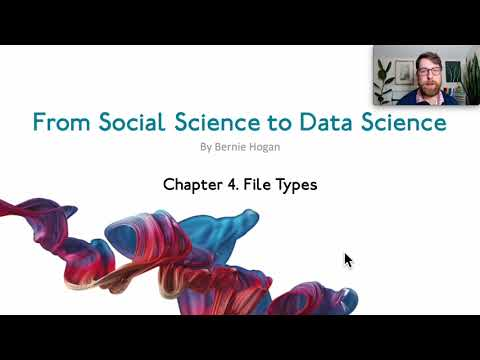

In [45]:
from IPython.display import YouTubeVideo

YouTubeVideo('6sJzb56GHwQ')

# Importing Data to a DataFrame

## A important note on file organisation

Excerpt from the book:

> "Starting with this chapter I will be making use of existing data. This data is available on the webpage for this book, even if it is drawn from publicly available sources. You should store this data in a folder adjacent to the folder where you store your Jupyter notebooks, not in the same folder as the notebooks. This keeps your files and your data much more organised. I have opted to do that with the code below. So if this file is in a folder called '`chapters`' under a folder called `'book'`, then you should also have a folder called `'data'` under `'book'`, like so: 

~~~
book
 |- chapters
 |- data
 |- exercises
 |- etc.
~~~

In [1]:
from pathlib import Path 

In [2]:
data_dir = Path.cwd().parent / "data"

try:
    if not data_dir.exists(): data_dir.mkdir()
except:
    print(f"There was an issue creating the directory at {data_dir}")
else:
    print(f"The data directory can be found at: {data_dir}.")

The data directory can be found at: /Users/berniehogan/Documents/github/fsstds/data.


## Example data 

Excerpt from the book: 
> "This chapter uses example data from places online where the data is freely available for secondary use. These will be available in the GitHub repository for this book. The path for the data folder is https://github.com/berniehogan/fsstds/tree/main/data . From here you can download the example files one by one. If you "clone" the repository and you have a copy of GitHub desktop (or know how to use GitHub from the command line) you can then copy the entire repository, which will include the data as well as all the notebooks with the paths in the correct place. To remind, these notebooks primarily contain the code. The book itself is available through Sage."

# Rectangular data: CSV 

## Using the `csv` library 

In [3]:
import csv

In [4]:
with open(data_dir / "MuppetsTable_simple.csv") as filein:
    file_reader = csv.reader(filein, delimiter=',', quotechar='"')
    for row in file_reader:
        print(row)

['Name', 'Gender', 'Species', 'Appearance']
['Fozzie', 'Male', 'Bear', '1976']
['Kermit', 'Male', 'Frog', '1955']
['Piggy', 'Female', 'Pig', '1974']
['Gonzo', 'Male', '', '1970']
['Rowlf', 'Male', 'Dog', '1962']
['Beaker', '', 'Muppet', '1977']
['Janice', 'Female', 'Muppet', '1975']
['Hilda', 'Female', 'Muppet', '1976']


### CSV and Quote characters 

In [5]:
with open(data_dir / "MuppetsTable_broken.csv") as filein:
    file_reader = csv.reader(filein)
    for row in file_reader:
        print(len(row),row)

5 ['Name', 'Gender', 'Species', 'Appearance', 'Notable Phrase']
5 ['Fozzie', 'Male', 'Bear', '1976', 'Wocka, Wokca!']
5 ['Kermit', 'Male', 'Frog', '1955', "It's not easy being green."]
6 ['Piggy', 'Female', 'Pig', '1974', '“I don’t care what you think of me', ' unless you think I’m awesome. In which case you are right.”']
5 ['Gonzo', 'Male', '', '1970', 'Weirdos have more fun.']
6 ['Rowlf', 'Male', 'Dog', '1962', '“Boy', ' is this piano outta tune! I love outta tune pianos.”']
5 ['Beaker', '', 'Muppet', '1977', 'Meep']
5 ['Janice', 'Female', 'Muppet', '1975', 'Groovy, man']
5 ['Hilda', 'Female', 'Muppet', '1976', "Gonzo, aren't you a little old to carry around a teddy bear?"]


In [6]:
with open(data_dir / "MuppetsTable_broken.csv") as filein:
    new_table = filein.read().replace('“','"').replace('”','"')

    fileout = open(data_dir / "MuppetsTable_fixed.csv",'w')
    fileout.write(new_table)
    fileout.close()

In [7]:
with open(data_dir / "MuppetsTable_fixed.csv") as filein:
    file_reader = csv.reader(filein)
    for row in file_reader:
        print(len(row), row)

5 ['Name', 'Gender', 'Species', 'Appearance', 'Notable Phrase']
5 ['Fozzie', 'Male', 'Bear', '1976', 'Wocka, Wokca!']
5 ['Kermit', 'Male', 'Frog', '1955', "It's not easy being green."]
5 ['Piggy', 'Female', 'Pig', '1974', 'I don’t care what you think of me, unless you think I’m awesome. In which case you are right.']
5 ['Gonzo', 'Male', '', '1970', 'Weirdos have more fun.']
5 ['Rowlf', 'Male', 'Dog', '1962', 'Boy, is this piano outta tune! I love outta tune pianos.']
5 ['Beaker', '', 'Muppet', '1977', 'Meep']
5 ['Janice', 'Female', 'Muppet', '1975', 'Groovy, man']
5 ['Hilda', 'Female', 'Muppet', '1976', "Gonzo, aren't you a little old to carry around a teddy bear?"]


In [8]:
with open(data_dir / "MuppetsTable_fixed.csv") as filein:
    reader = csv.DictReader(filein)
    for row in reader:
        print(row['Name'], row['Appearance'])

Fozzie 1976
Kermit 1955
Piggy 1974
Gonzo 1970
Rowlf 1962
Beaker 1977
Janice 1975
Hilda 1976


## Using the Pandas CSV reader: `read_csv()` 

In [9]:
import pandas as pd 

In [10]:
df = pd.read_csv(data_dir / "MuppetsTable_fixed.csv") 
display(df.iloc[:,:4]) # Using iloc to get first four columns.

,Name,Gender,Species,Appearance
0,Fozzie,Male,Bear,1976
1,Kermit,Male,Frog,1955
2,Piggy,Female,Pig,1974
3,Gonzo,Male,NaN,1970
4,Rowlf,Male,Dog,1962
5,Beaker,NaN,Muppet,1977
6,Janice,Female,Muppet,1975
7,Hilda,Female,Muppet,1976


# Rectangular rich data: Excel 

In [11]:
wb_df = pd.read_excel(data_dir / "World Bank Indicators 2012-2021.xlsx")

display(wb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1066 non-null   object
 1   Country Code   1064 non-null   object
 2   Series Name    1064 non-null   object
 3   Series Code    1064 non-null   object
 4   2011 [YR2011]  1064 non-null   object
 5   2012 [YR2012]  1064 non-null   object
 6   2013 [YR2013]  1064 non-null   object
 7   2014 [YR2014]  1064 non-null   object
 8   2015 [YR2015]  1064 non-null   object
 9   2016 [YR2016]  1064 non-null   object
 10  2017 [YR2017]  1064 non-null   object
 11  2018 [YR2018]  1064 non-null   object
 12  2019 [YR2019]  1064 non-null   object
 13  2020 [YR2020]  1064 non-null   object
dtypes: object(14)
memory usage: 117.1+ KB


None

In [12]:
display(wb_df.iloc[:,:3])

,Country Name,Country Code,Series Name
0,Afghanistan,AFG,"Population, total"
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...
2,Afghanistan,AFG,"GNI, Atlas method (current US$)"
3,Afghanistan,AFG,Individuals using the Internet (% of population)
4,Albania,ALB,"Population, total"
...,...,...,...
1064,NaN,NaN,NaN
1065,NaN,NaN,NaN
1066,NaN,NaN,NaN
1067,Data from database: World Development Indicators,NaN,NaN


In [13]:
wb_df.iloc[:,:4].tail(7)

,Country Name,Country Code,Series Name,Series Code
1062,World,WLD,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD
1063,World,WLD,Individuals using the Internet (% of population),IT.NET.USER.ZS
1064,NaN,NaN,NaN,NaN
1065,NaN,NaN,NaN,NaN
1066,NaN,NaN,NaN,NaN
1067,Data from database: World Development Indicators,NaN,NaN,NaN
1068,Last Updated: 04/08/2022,NaN,NaN,NaN


In [14]:
# Remember the [:-5] is what slices off the last five rows
wb_df.iloc[:-5].to_excel(data_dir / "Cleaned_Popular_Indicators.xlsx",
                        index=False)

# Nested data: `JSON` (JavaScript Object Notation)

## Loading JSON

In [15]:
import json 

mdata = json.loads(open(data_dir / "omdb_Muppet_search_page_1.json").read())
type(mdata)

dict

In [16]:
print(json.dumps(mdata,indent=2)[:300])

{
  "Search": [
    {
      "Title": "The Muppet Christmas Carol",
      "Year": "1992",
      "imdbID": "tt0104940",
      "Type": "movie"
    },
    {
      "Title": "The Muppet Movie",
      "Year": "1979",
      "imdbID": "tt0079588",
      "Type": "movie"
    },
    {
      "Title": "The Muppet


In [17]:
mdata.keys()

dict_keys(['Search', 'totalResults', 'Response'])

In [18]:
print(mdata['totalResults'],
      mdata['Response'])

62 True


In [19]:
print(mdata['Search'][0])

{'Title': 'The Muppet Christmas Carol', 'Year': '1992', 'imdbID': 'tt0104940', 'Type': 'movie'}


In [20]:
print(json.dumps(mdata['Search'][0],indent=2))

{
  "Title": "The Muppet Christmas Carol",
  "Year": "1992",
  "imdbID": "tt0104940",
  "Type": "movie"
}


In [21]:
results = { "Search":[
                 {"Title":"Ghosts of Hidden Valley",
                  "Year":2010},
                 {"Title":"The Perspex Event",
                  "Year":2018}]
          }

In [22]:
pd.json_normalize(results["Search"])

,Title,Year
0,Ghosts of Hidden Valley,2010
1,The Perspex Event,2018


In [23]:
mdf = pd.json_normalize(mdata["Search"])
display(mdf.iloc[:,:3])

,Title,Year,imdbID
0,The Muppet Christmas Carol,1992,tt0104940
1,The Muppet Movie,1979,tt0079588
2,The Muppet Show,1976–1981,tt0074028
3,Muppet Treasure Island,1996,tt0117110
4,The Great Muppet Caper,1981,tt0082474
5,Muppet Babies,1984–2020,tt0086764
6,It's a Very Merry Muppet Christmas Movie,2002,tt0329737
7,A Muppet Family Christmas,1987,tt0251282
8,Muppet*vision 3-D,1991,tt0102481
9,Muppet Classic Theater,1994,tt0213096


In [24]:
pd.json_normalize(mdata)

,Search,totalResults,Response
0,"[{'Title': 'The Muppet Christmas Carol', 'Year...",62,True


# Nested markup languages: HTML and XML 

## HTML: Hypertext Markup Language 

## Wikipedia as a data source 

## Wikipedia as HTML 

In [25]:
with open(data_dir / "Canada - Wikipedia.html") as infile: 
    wiki_HTML = infile.read()

print(len(wiki_HTML))

1091805


In [26]:
print(wiki_HTML[:200])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Canada - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakF


## Using BeautifulSoup for markup data

In [27]:
import bs4

In [28]:
soup = bs4.BeautifulSoup(wiki_HTML, 'html.parser')

print(soup.title.text)

# Query the soup for all 'a' tags. (Knowing that 'a' tags refer to links)
links = soup.find_all("a")
print(len(links))

Canada - Wikipedia
4381


## Data Scepticism

In [29]:
import random 

In [30]:
print("Head: ", links[0])
print("Tail: ", links[-1])

spot = random.choice(links)
print("Random: ", spot)

Head:  <a id="top"></a>
Tail:  <a href="https://www.mediawiki.org/"><img alt="Powered by MediaWiki" height="31" loading="lazy" src="/static/images/footer/poweredby_mediawiki_88x31.png" srcset="/static/images/footer/poweredby_mediawiki_132x47.png 1.5x, /static/images/footer/poweredby_mediawiki_176x62.png 2x" width="88"/></a>
Random:  <a href="#cite_ref-LeattMapa2003_321-0">^</a>


In [31]:
links[-1].attrs

{'href': 'https://www.mediawiki.org/'}

In [32]:
href_links = [x for x in soup.find_all('a') if 'href' in x.attrs]

print(f"There are {len(href_links)} 'href' links in this file.")

print(f"The first 'href' link:\n{href_links[0]}")

There are 4377 'href' links in this file.
The first 'href' link:
<a href="/wiki/Wikipedia:Featured_articles" title="This is a featured article. Click here for more information."><img alt="Featured article" data-file-height="438" data-file-width="462" decoding="async" height="19" src="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/30px-Cscr-featured.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/40px-Cscr-featured.svg.png 2x" width="20"/></a>


In [33]:
href_ext_links = [x for x in soup.find_all('a') if
                  'href' in x.attrs and # Do this if clause first
                  '://' in x.get('href')] # since this depends on first if

print(f"There are {len(href_ext_links)} 'href' & '://' links in this file.")
print(f"The first 'href' and '://' link:\n{href_ext_links[0].get('href')}")

There are 950 'href' & '://' links in this file.
The first 'href' and '://' link:
https://en.wikipedia.org/w/index.php?title=Canada&action=edit


In [34]:
href_int_links = [x for x in soup.find_all('a')
                  if 'href' in x.attrs and "://" not in x.get('href')]

print(f"There are {len(href_int_links)} 'href' internal links in this file.")
print(f"The first 'href' internal link:\n{href_int_links[0].get('href')}")

There are 3427 'href' internal links in this file.
The first 'href' internal link:
/wiki/Wikipedia:Featured_articles


# XML

In [35]:
with open(data_dir / "Canada - Wikipedia Special Export.xml") as infile: 
    wiki_XML = infile.read()

print(len(wiki_XML))
print(wiki_XML[:300])

277240
<mediawiki xmlns="http://www.mediawiki.org/xml/export-0.10/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.mediawiki.org/xml/export-0.10/ http://www.mediawiki.org/xml/export-0.10.xsd" version="0.10" xml:lang="en">
  <siteinfo>
    <sitename>Wikipedia</sitename>


In [36]:
import bs4

wiki_XML = wiki_XML.replace('<text xml:space=','<wikitext xml:space=')

soup = bs4.BeautifulSoup(wiki_XML, 'lxml')

print(soup.mediawiki.page.revision.id.text )

1079679373


## Navigating XML

In [37]:
# for i in soup.children: print(i.name)
# for i in soup.html.children: print(i.name)
# for i in soup.html.body.children: print(i.name)
# for i in soup.html.body.mediawiki.children: print(i.name) 
# for i in soup.html.body.mediawiki.page: print(i.name)
for i in soup.html.body.mediawiki.page.revision: 
    if name := i.name: print(name)

id
parentid
timestamp
contributor
minor
comment
model
format
text
sha1


In [38]:
print(soup.html.body.mediawiki.page.revision.id)
# Notice how we can shorten it (and get the text directly): 
print(soup.revision.id.text)

<id>1079679373</id>
1079679373


In [39]:
print(soup.id, soup.id.parent.name, sep="\n")

<id>5042916</id>
page


## Using `xmltodict`

In [40]:
# You may need to install xmltodict.
# This code is extra careful to check for the right version of Python for
# installation. In fairness, `pip install <library>` usually works  fine.

try: 
    import xmltodict
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install xmltodict
    import xmltodict

In [41]:
with open(data_dir / "Canada - Wikipedia Special Export.xml") as infile:
    doc = xmltodict.parse(infile.read())

In [42]:
print(doc.keys())
print(doc['mediawiki'].keys())
print(doc['mediawiki']['@xmlns'])

dict_keys(['mediawiki'])
dict_keys(['@xmlns', '@xmlns:xsi', '@xsi:schemaLocation', '@version', '@xml:lang', 'siteinfo', 'page'])
http://www.mediawiki.org/xml/export-0.10/


In [43]:
print(doc['mediawiki']['page']['revision']['id'])

1079679373


# Serialization

In [44]:
import pickle

data_example = {'RevisionID':1079679373, 'PageID':5042916}
data_for_pickle = [data_example,'Other Data',3.1415]

pickle.dump(data_for_pickle,
            open(data_dir / 'temp.pkl','wb'))

# Check to see if the data comes back as we expected
data_from_pkl = pickle.load(open(data_dir / 'temp.pkl','rb'))
print(data_from_pkl)

[{'RevisionID': 1079679373, 'PageID': 5042916}, 'Other Data', 3.1415]


## Long term storage: Pickles and feather 

# Summary

# Extending and reflecting 